In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ament_index_python.packages import get_package_share_directory

import os

In [2]:
from KinodynamicRRT import KinodynamicRRT
from ESDF import get_esdf
from State import State, CarDynamics

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
# Read in map from saved file
maps_dir = f"/home/marshallvielmetti/ros2_ws/install/exploration_sim_utils/share/exploration_sim_utils/maps"

# print out the list of files in the map directory, in order
map_files = os.listdir(maps_dir)
map_files.sort()
print(map_files)

['map_2025-03-20 18:45:45.130394.csv', 'map_2025-03-20 18:48:29.127714.csv', 'map_2025-03-20 18:48:29.608585.csv', 'map_2025-03-20 18:49:38.626596.csv', 'map_2025-03-20 18:49:39.108544.csv', 'map_2025-03-20 18:51:06.130138.csv', 'map_2025-03-20 18:51:06.608637.csv', 'map_2025-03-20 18:52:24.500306.csv', 'map_2025-03-20_18:56:55.csv']


Reading map from /home/marshallvielmetti/ros2_ws/install/exploration_sim_utils/share/exploration_sim_utils/maps/map_2025-03-20 18:45:45.130394.csv
Map shape: (78, 94)


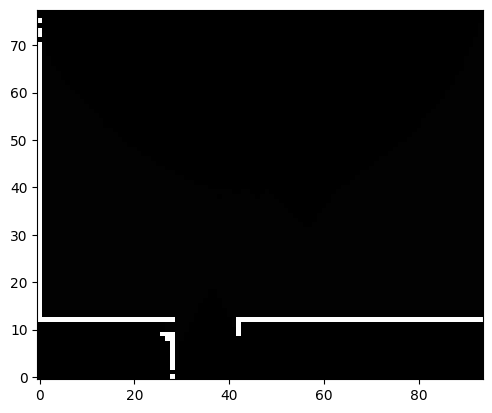

In [5]:
# Read in the map
map_file = map_files[0]
map_path = os.path.join(maps_dir, map_file)
print(f"Reading map from {map_path}")
map_data = np.loadtxt(map_path, delimiter=',')
print(f"Map shape: {map_data.shape}")

# Plot the map
plt.imshow(map_data, cmap='gray', origin='lower')
plt.show()

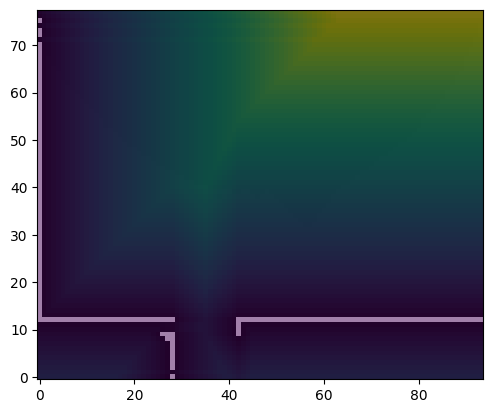

In [6]:
fig, ax = plt.subplots()

esdf = get_esdf(map_data)

ax.imshow(map_data, cmap='gray', origin='lower')
ax.imshow(esdf, cmap='viridis', origin='lower', alpha=0.5)

plt.show()

In [ ]:
dyns = CarDynamics()

x0 = np.array([20, 70, -np.pi / 2, 1, 0])
x1 = np.array([0, 60, -np.pi, 0.1, 0])

# tau_star, states, controls = dyns.compute_cost(x0, x1)
tau_star, states, controls = dyns.compute_constrained_cost(x0, x1, 100)

print(f"Optimal time: {tau_star}")
print(f"States: {states}")
print(f"Controls: {controls}")

# plot the trajectory
fig, ax = plt.subplots()
for state in states:
    print(f"State: {state.shape}")
    x, y, theta, v, omega = state.flatten()
    print(f"x: {x}, y: {y}, theta: {theta}, v: {v}, omega: {omega}")
    # plot the state as an arrow showing the direction of the car and velocity
    # ax.arrow(state[0], state[1], np.cos(state[2]), np.sin(state[2]), head_width=0.5, head_length=1, fc='r', ec='r', width=0.05)
    # ax.arrow(x, y, 0.5*np.cos(theta), 0.5*np.sin(theta), head_width=0.5, head_length=1, fc='r', ec='r', width=0.05) # , head_width=1, head_length=1, fc='r', ec='r', width=0.05)

    ax.plot(state[0], state[1], 'ro')


plt.show()


Computing cost for i=1, j=1
Computing Constrained Cost
                                     CVXPY                                     
                                     v1.6.4                                    
(CVXPY) Mar 23 03:31:22 PM: Your problem has 710 variables, 1915 constraints, and 0 parameters.
(CVXPY) Mar 23 03:31:22 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Mar 23 03:31:22 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Mar 23 03:31:22 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Mar 23 03:31:22 PM: Your problem is compiled with the CPP canonicalization backend.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Mar 2

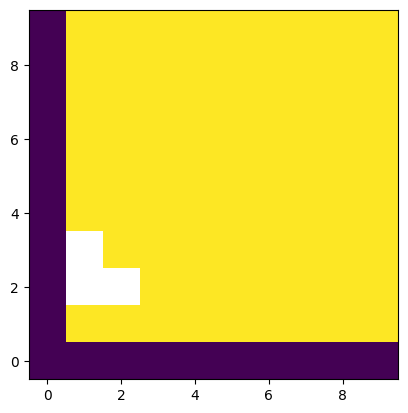

In [10]:

dyns = CarDynamics()

nx, ny = np.meshgrid(np.arange(10), np.arange(10))

cost = np.zeros((10, 10))

x0 = np.array([0, 0, 0, 1, 0])

for i in range(1, 10):
    for j in range(1, 10):
        print(f"Computing cost for i={i}, j={j}")
        tau_star, states, controls = dyns.compute_constrained_cost(x0, np.array([i, j, 0, 1, 0]), 100)
        cost[i][j] = tau_star

plt.imshow(cost, cmap='viridis', origin='lower')

In [7]:
from KinodynamicRRTStar import KinodynamicRRTStar
from State import State

In [28]:
start_state = State(10, 20, 0, 1, 0)
goal_state = State(10, 60, 0, 10, 0)
rrt_star = KinodynamicRRTStar(esdf)

In [29]:
state, control = rrt_star.plan(start_state, goal_state)

if (state is None):
    print("No path found")
else:
    print(f"Path found with {len(state)} states and {len(control)} controls")
    for i in range(1, len(state)):
        plt.plot(state[i][0], state[i][1], 'ro')

/home/marshallvielmetti/ros2_ws/src/robotic_exploration/exploration_sim_utils/scripts/AnalyticalControlUtil.py:77: RuntimeWarning: Input "a" has an eigenvalue pair whose sum is very close to or exactly zero. The solution is obtained via perturbing the coefficients.
  return solve_continuous_lyapunov(A, -B @ R_inv @ B.T)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [48]:
from NumericalOptimalControl import NumericalOptimalControlSolver
from CarDynamics import CarDynamics
cd = CarDynamics()
nocs = NumericalOptimalControlSolver(cd)

start_state = State(10, 10, 0, 1, 0)
# goal_state = State(12, 20, np.pi / 2, 7, 0)
goal_state = State(15, 10, 0, 1, 0)
cost, state, control = nocs.solve(start_state, goal_state, 20)
cost, state, control

Optimization Successful! -- 20.36097791852373
Optimization Successful! -- 10.601163014945348
Optimization Successful! -- 5.0
Optimization Successful! -- 432.5215706067508


(np.float64(5.0),
  <State.Control at 0x76178ccd6870>])

TypeError: object of type 'NoneType' has no len()

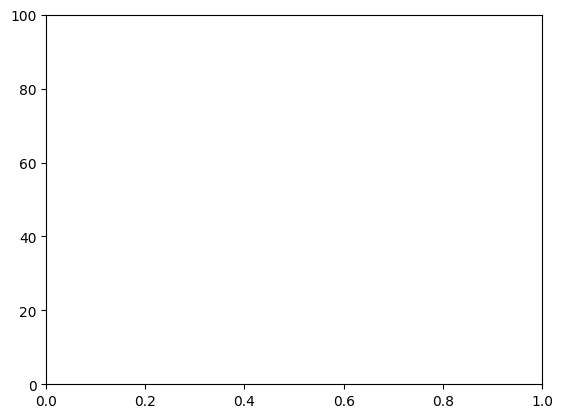

In [112]:
plt.ylim(0, 100)
for i in range(1, len(state)):
    plt.xlim(0, 100)
    plt.plot(state[i][0], state[i][1], 'ro')
    # plt.plot(i, state[i][4], 'ro')

In [73]:
import cvxpy as cp
cp.installed_solvers()

['CLARABEL', 'ECOS', 'ECOS_BB', 'OSQP', 'SCIPY', 'SCS']